<a href="https://colab.research.google.com/github/linhsuan519/titanic-analysis/blob/main/%E5%AF%A6%E4%BD%9C%E5%B0%88%E9%A1%8C_01_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#專題實作#01:鐵達尼號存活預測

#環境準備

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

#載入資料與認識資料

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


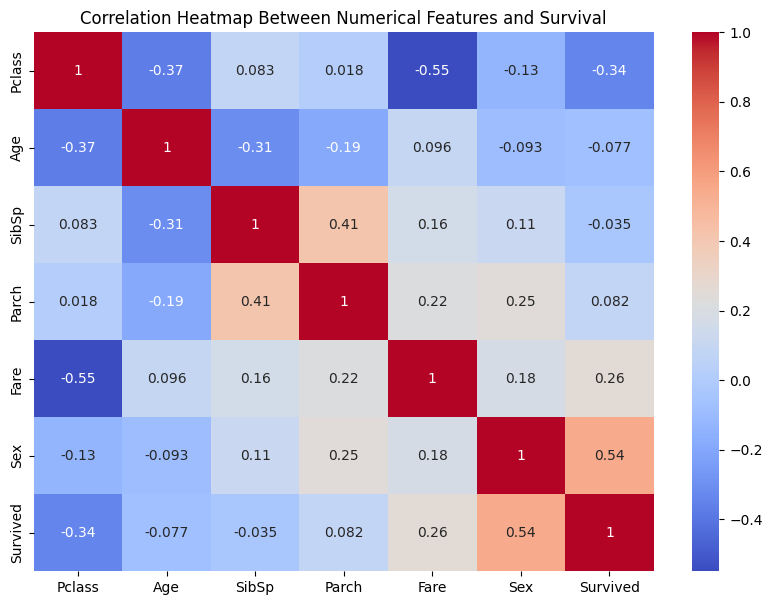

In [13]:
# 1.在你的 Colab 程式碼中載入 Titanic 資料集的 `train.csv` 資料集，可以參考這一篇 教學 中的網址或上傳方法。
#（資料網址：https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv）
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
display(df)

df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1}) #性別傳換數值

# 2.請根據 Kaggle 文件瞭解 Titanic 資料中所有欄位的定義為何？

#	PassengerId:   乘客編號
# survival:     是否生存 0:死亡 1:生存
# pclass:      船票艙位 1:頭等艙 2:商務艙 3:經濟艙
# sex:       性別
# Age:       年齡
# sibsp:      兄弟姊妹或配偶上船的數量
# parch:      父母或小孩上船的數量
# ticket:      船票編號
# fare:       票價
# cabin:      艙位編號
# embarked:    上船港口 C = Cherbourg, Q = Queenstown, S = Southampton。

# 3.進一步觀察每一個欄位「數值欄位/類別欄位」與「是否生存欄位」之關係程度，找出關係大的欄位。

# Selecting numerical features
numerical_features = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex"]

# Calculating the correlation matrix between numerical features and 'Survived'
correlation_matrix = df[numerical_features + ["Survived"]].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap Between Numerical Features and Survival")
plt.show()

#熱力圖展示了數值欄位與「是否生存」之間的相關性。

#4.承上題，請問你是如何定義與解讀什麼稱為「關係大」呢？
#Pclass（船票等級）與生存有明顯的負相關   越有錢的客人可能會得到更多的關注和優待(1最貴)
#Sex(性別)     與生存有正相關      女性較容易受到保護(女生:1 男生:0)
#Fare（船票價格） 與生存有正相關      這可能反映了付出更多的乘客享受更好的待遇




